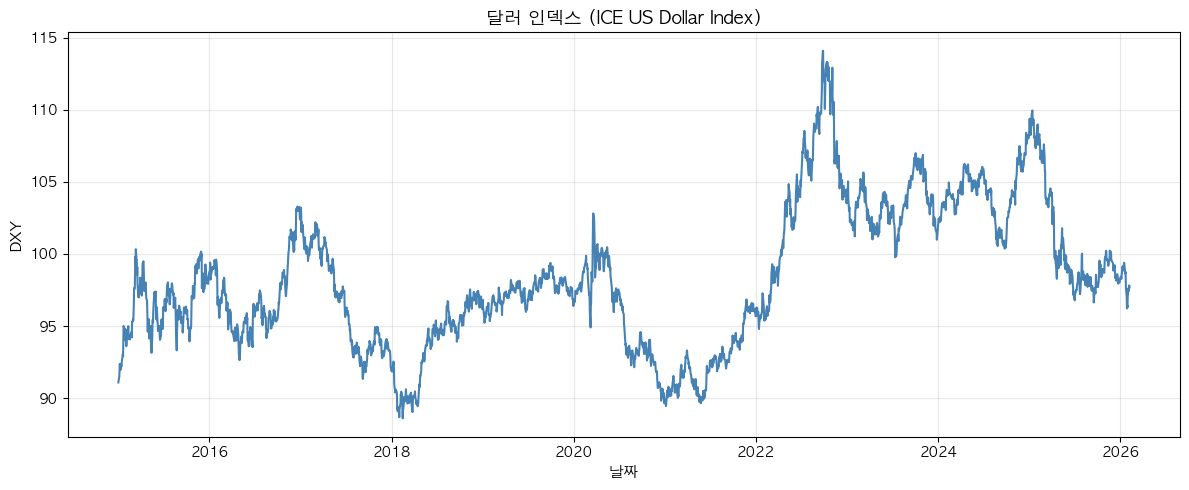

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ICE US Dollar Index (Yahoo: DX-Y.NYB)
dxy_raw = yf.download("DX-Y.NYB", start="2015-01-01", progress=False, auto_adjust=True)
close = dxy_raw["Close"].squeeze()
dxy = pd.DataFrame({"DXY": close}, index=close.index).dropna()

# DXY 시계열 플롯
plt.rcParams['font.family'] = ['AppleGothic', 'Arial Unicode MS', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(dxy.index, dxy["DXY"], color="steelblue", linewidth=1.5)
ax.set_xlabel("날짜", fontsize=11)
ax.set_ylabel("DXY", fontsize=11)
ax.set_title("달러 인덱스 (ICE US Dollar Index)", fontsize=13, fontweight="bold")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

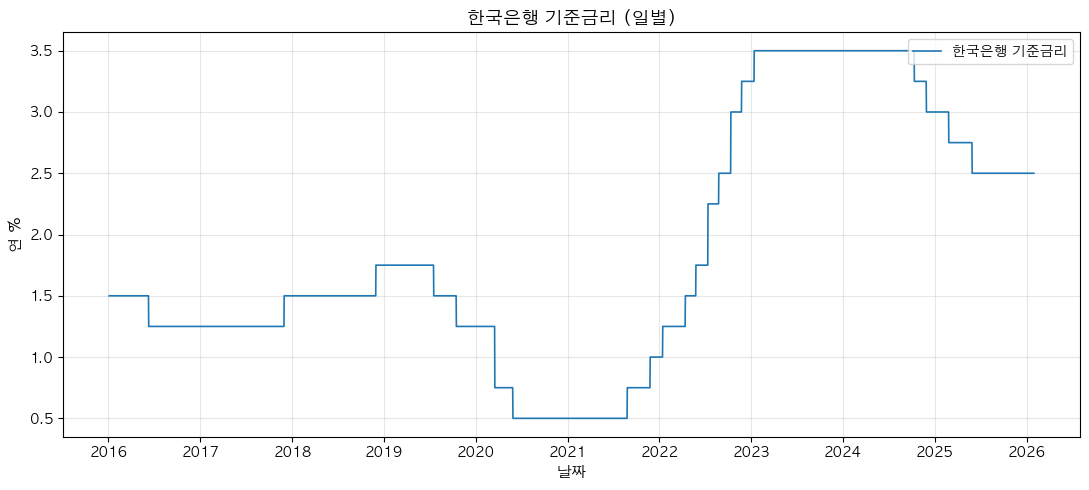

In [ ]:
# 한국은행 기준금리 및 여수신금리 시각화
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

plt.rcParams["font.family"] = ["AppleGothic", "Arial Unicode MS", "sans-serif"]
plt.rcParams["axes.unicode_minus"] = False

csv_path = "../dataset/한국은행 기준금리 및 여수신금리_31185504.csv"
df = pd.read_csv(csv_path, encoding="utf-8")
date_cols = [c for c in df.columns if "/" in str(c) and len(str(c).split("/")) == 3]
row = df.iloc[0]
dates, values = [], []
for col in date_cols:
    val = row[col]
    if pd.notna(val) and str(val).strip():
        s = str(val).replace(",", "").strip()
        try:
            v = float(s)
            values.append(v)
            parts = str(col).split("/")
            if len(parts) == 3:
                dates.append(pd.to_datetime(f"{parts[0]}-{parts[1]}-{parts[2]}"))
        except ValueError:
            pass

ts = pd.DataFrame({"date": dates, "기준금리(연%)": values}).dropna()
ts = ts.sort_values("date").reset_index(drop=True)

fig, ax = plt.subplots(figsize=(11, 5))
ax.plot(ts["date"], ts["기준금리(연%)"], color="#1f77b4", linewidth=1.2, label="한국은행 기준금리")
ax.set_ylabel("연 %", fontsize=11)
ax.set_xlabel("날짜", fontsize=11)
ax.set_title("한국은행 기준금리 (일별)", fontsize=13)
ax.legend(loc="upper right")
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.tight_layout()
plt.show()

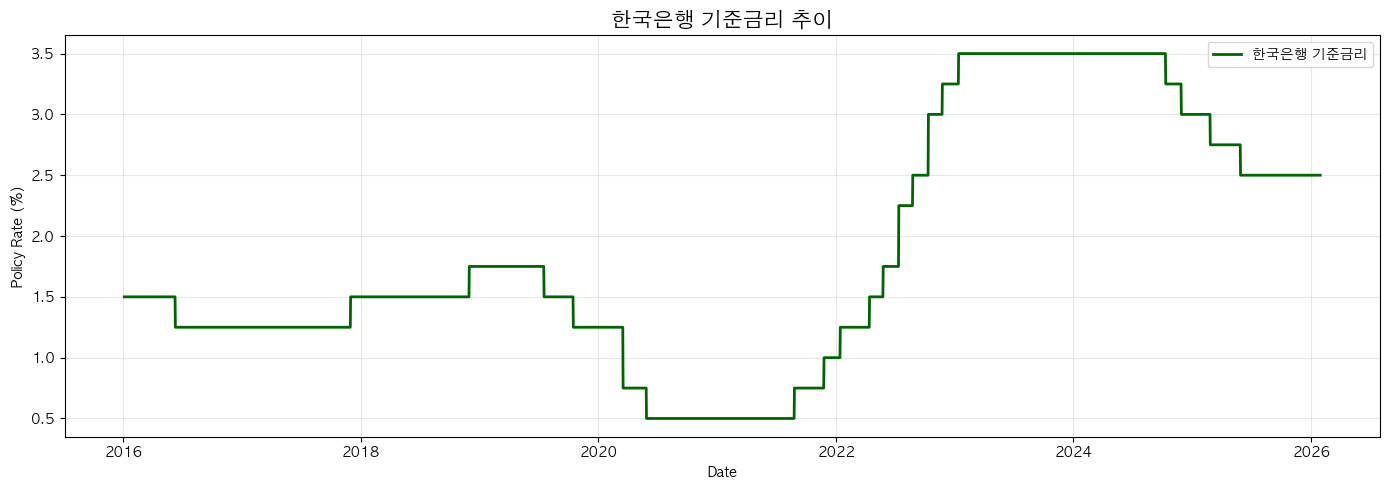

In [ ]:
# 한국은행 기준금리 CSV → 밑에서 그래프로 바로 보기
import pandas as pd
import matplotlib.pyplot as plt

# CSV 불러오기 (날짜가 컬럼명, 금리값은 첫 행)
df = pd.read_csv("../dataset/한국은행 기준금리 및 여수신금리_31185504.csv", encoding="utf-8")
date_cols = [c for c in df.columns if "/" in str(c) and len(str(c).split("/")) == 3]
row = df.iloc[0]
dates, values = [], []
for col in date_cols:
    val = row[col]
    if pd.notna(val) and str(val).strip():
        s = str(val).replace(",", "").strip()
        try:
            values.append(float(s))
            parts = str(col).split("/")
            if len(parts) == 3:
                dates.append(pd.to_datetime(f"{parts[0]}-{parts[1]}-{parts[2]}"))
        except ValueError:
            pass

kr_rate = pd.DataFrame({"date": dates, "policy_rate": values}).dropna()
kr_rate = kr_rate.sort_values("date").reset_index(drop=True)

plt.rcParams["font.family"] = ["AppleGothic", "Arial Unicode MS", "sans-serif"]
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize=(14, 5))
plt.plot(kr_rate["date"], kr_rate["policy_rate"], color="darkgreen", linewidth=2, label="한국은행 기준금리")
plt.title("한국은행 기준금리 추이", fontsize=15, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Policy Rate (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

,date,parspread,short,long,cds_gap
59,2001-06-19,0.010451,0.009450,0.012248,-0.002798
60,2001-06-20,0.010451,0.009700,0.012219,-0.002518
61,2001-06-21,0.010089,0.009878,0.012184,-0.002306
62,2001-06-22,0.010056,0.010049,0.012151,-0.002101
63,2001-06-25,0.010056,0.010220,0.012118,-0.001897
...,...,...,...,...,...
6470,2026-01-19,0.001944,0.001925,0.002489,-0.000565
6471,2026-01-20,0.001940,0.001929,0.002484,-0.000555
6472,2026-01-21,0.001940,0.001933,0.002478,-0.000545
6473,2026-01-22,0.001915,0.001929,0.002472,-0.000542


[*********************100%***********************]  1 of 1 completed


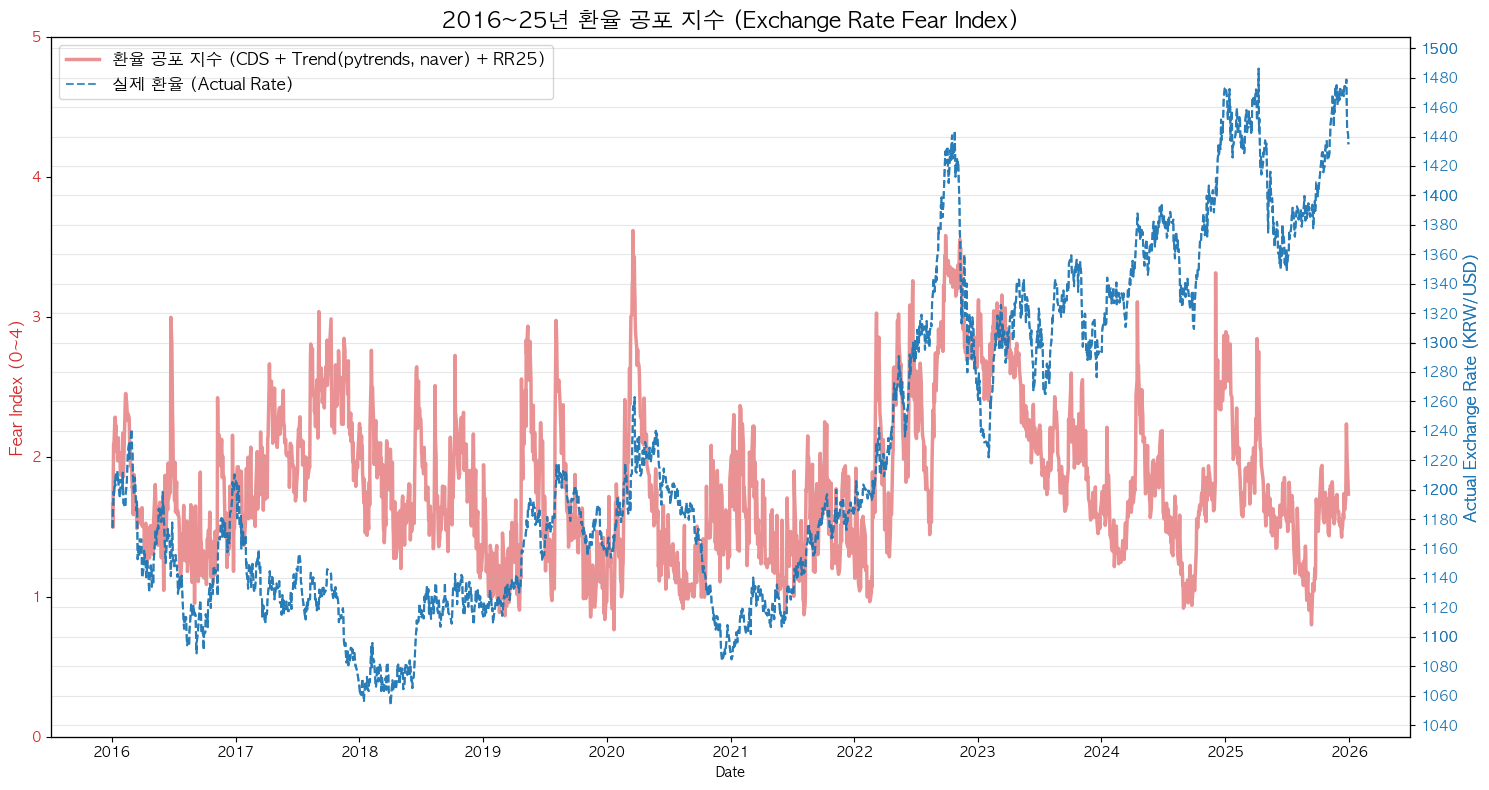

            parspread     short      long   cds_gap   변동성     Gap_60   합  \
date                                                                       
2016-01-04   0.005020  0.004886  0.005079 -0.000193   9.7  31.185000  41   
2016-01-05   0.004969  0.004904  0.005074 -0.000171   8.4  31.040000  40   
2016-01-06   0.005193  0.004976  0.005070 -0.000095  10.7  40.291667  43   
2016-01-07   0.005516  0.005109  0.005068  0.000042   7.4  42.040000  47   
2016-01-08   0.005424  0.005225  0.005065  0.000159  10.0  38.733333  41   

              네이버검색량     RR    real_rate  60_gap_norm  gap_norm  trend_norm  \
date                                                                          
2016-01-04  10.36926  0.363  1174.109985     0.642290  0.171134    0.272727   
2016-01-05  11.08535  0.038  1187.359985     0.641559  0.144330    0.263636   
2016-01-06  11.92462  0.338  1188.719971     0.688224  0.191753    0.290909   
2016-01-07  13.98070  0.375  1198.739990     0.697043  0.123711    0.327

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import StandardScaler

# 일별 환율 고가-저가 변동성 (2014~2025)
exchange_rate_df = pd.read_csv('../dataset/일별 고가-저가 14-25.csv')

# 환율 120일 장기 평균과의 차이 (2014~2025)
avg_gap = pd.read_csv("../dataset/60일 평균값 대비 환율 14-25.csv")

# 일별 국채 CDS 가격 (2001~2025)
cds_df = pd.read_csv('../dataset/KOREA CDS 2001-2025.csv')
cds_df['date'] = pd.to_datetime(cds_df['date'].astype(str).str.replace(' ', ''))
cds_df = cds_df.sort_values('date')

# 일별 환율 관련 pytrend 검색량 (환율 + 원달러. 2094~2025)
pytrends_df = pd.read_csv("../dataset/exchange_rate_2004_2025_merged.csv")

# 일별 환율 관련 네이버 검색량 (환율 + 원달러. 2016~2025)
navertrends_df = pd.read_csv("../dataset/네이버검색량.csv")

# Risk Reversal 25 (2014~2025)
df_rr = pd.read_excel('../dataset/1M.xlsx') 
df_rr = df_rr.iloc[:, :2]
df_rr.columns = ['date', 'RR']


import platform
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 1. 데이터 전처리: 날짜 컬럼 통일 및 Datetime 변환
# CDS Data (날짜 -> date)
cds_prep = cds_df.copy()
cds_prep['date'] = pd.to_datetime(cds_prep['date'])
cds_prep = cds_prep[['date', 'parspread']] # 필요한 컬럼만 선택
cds_prep['short'] = cds_prep['parspread'].rolling(5, min_periods=1).mean() # 5일 CDS 평균치
cds_prep['long']  = cds_prep['parspread'].rolling(252, min_periods=60).mean() # 252일 CDS 평균치
cds_prep['cds_gap'] = cds_prep['short'] - cds_prep['long'] # 5일평균 - 252일평균 (최근 변화량)
cds_prep = cds_prep.dropna()
display(cds_prep)

# Exchange Rate Gap Data (Unnamed: 0 -> date)
gap_prep = exchange_rate_df.copy()
gap_prep['date'] = pd.to_datetime(gap_prep['date'])
gap_prep = gap_prep[['date', '변동성']]

# 60 Days Gap Data 
avg_gap_prep = avg_gap.copy()
avg_gap_prep['date'] = pd.to_datetime(avg_gap_prep['date'])
avg_gap_prep = avg_gap_prep[['date', 'Gap_60']]

# Pytrends Data (date 컬럼 그대로 사용)
trend_prep = pytrends_df.copy()
trend_prep['date'] = pd.to_datetime(trend_prep['date'])
trend_prep = trend_prep[['date', '합']]

# Naver Datalab Data (date 컬럼 그대로 사용)
naver_prep = navertrends_df.copy()
naver_prep['date'] = pd.to_datetime(naver_prep['date'])
naver_prep = naver_prep[['date', '네이버검색량']]

# RR25 데이터
rr25_prep = df_rr.copy()
rr25_prep['date'] = pd.to_datetime(rr25_prep['date'], dayfirst=True, errors='coerce')
rr25_prep['RR'] = pd.to_numeric(rr25_prep['RR'], errors='coerce')
rr25_prep = rr25_prep.dropna().sort_values('date')

real_er = yf.download('KRW=X', start='2014-01-01', end='2025-12-31')

# yfinance MultiIndex 컬럼 처리 (에러 방지)
if isinstance(real_er.columns, pd.MultiIndex):
    real_er.columns = real_er.columns.get_level_values(0)

real_er = real_er.reset_index()
if 'Date' in real_er.columns:
    real_er = real_er.rename(columns={'Date': 'date'})
real_er['date'] = pd.to_datetime(real_er['date']).dt.tz_localize(None)
real_er = real_er[['date', 'Close']].rename(columns={'Close': 'real_rate'})

# 2. 데이터 병합 (Inner Join으로 모든 데이터가 존재하는 날짜만 남김)
merged_df = pd.merge(cds_prep, gap_prep, on='date', how='inner')
merged_df = pd.merge(merged_df, avg_gap_prep, on='date', how='inner') 
merged_df = pd.merge(merged_df, trend_prep, on='date', how='inner')
merged_df = pd.merge(merged_df, naver_prep, on='date', how='inner')
merged_df = pd.merge(merged_df, rr25_prep, on='date', how='inner')
merged_df = pd.merge(merged_df, real_er, on='date', how='inner')

# 날짜순 정렬 및 인덱스 설정
merged_df = merged_df.sort_values('date').set_index('date')

# 3. 정규화 (0~1 Scaling) 함수 정의
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# 각 지표 정규화 적용
merged_df['60_gap_norm'] = min_max_normalize(merged_df['Gap_60']) 
merged_df['gap_norm'] = min_max_normalize(merged_df['변동성'])
merged_df['trend_norm'] = min_max_normalize(merged_df['합'])
#merged_df['navertrend_norm'] = min_max_normalize(merged_df['네이버검색량'])
merged_df['navertrend_norm'] = merged_df['네이버검색량'].rank(pct=True)
merged_df['cds_norm'] = min_max_normalize(merged_df['cds_gap'])
merged_df['RR_norm'] = merged_df['RR'].rank(pct=True)


# 4. 환율 공포 지수 생성 (정규화 값들의 합)
# merged_df['fear_index'] = merged_df['cds_norm'] + merged_df['trend_norm'] + merged_df['gap_norm'] + merged_df['60_gap_norm'] + merged_df['RR_Z']
# merged_df['fear_index'] = merged_df['cds_norm'] + merged_df['trend_norm'] + merged_df['60_gap_norm']
merged_df['fear_index'] = merged_df['cds_norm'] + merged_df['RR_norm'] + merged_df['trend_norm'] + merged_df['navertrend_norm']

# 시각화 (이중 축 그래프)
fig, ax1 = plt.subplots(figsize=(15, 8))

# [왼쪽 축] 환율 공포 지수 (빨강)
ax1.set_xlabel('Date')
ax1.set_ylabel('Fear Index (0~4)', color='tab:red', fontsize=12)
line1 = ax1.plot(merged_df.index, merged_df['fear_index'], color='tab:red', label='환율 공포 지수 (CDS + Trend(pytrends, naver) + RR25)', linewidth=2.5, alpha=0.5)
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_ylim(0.0, 5.0) 

# [오른쪽 축] 실제 환율 (파랑)
ax2 = ax1.twinx()
ax2.set_ylabel('Actual Exchange Rate (KRW/USD)', color='tab:blue', fontsize=12)
line2 = ax2.plot(merged_df.index, merged_df['real_rate'], color='tab:blue', label='실제 환율 (Actual Rate)', linestyle='--', alpha=0.8)
ax2.tick_params(axis='y', labelcolor='tab:blue')

# 범례 통합
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=12)

from matplotlib.ticker import MultipleLocator

# [오른쪽 축] 실제 환율 (파랑)
ax2 = ax1.twinx()
ax2.set_ylabel('Actual Exchange Rate (KRW/USD)', color='tab:blue', fontsize=12)
line2 = ax2.plot(
    merged_df.index,
    merged_df['real_rate'],
    color='tab:blue',
    label='실제 환율 (Actual Rate)',
    linestyle='--',
    alpha=0.8,
)
ax2.tick_params(axis='y', labelcolor='tab:blue')

# ★ 여기 추가: y축 눈금 20 단위
ax2.yaxis.set_major_locator(MultipleLocator(20))

plt.title('2016~25년 환율 공포 지수 (Exchange Rate Fear Index)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

# 데이터 확인
print(merged_df.head())

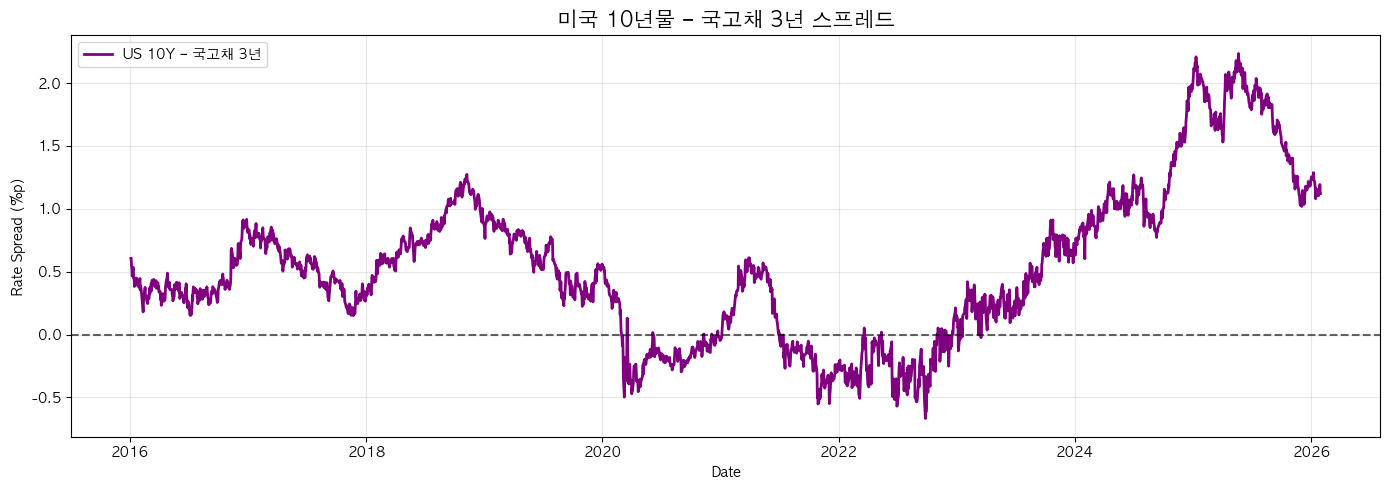

In [ ]:
# US 10Y − 국고채 3년 스프레드
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

# 미국 10년물 국채 금리 (FRED DGS10)
us_10y = web.DataReader("DGS10", "fred", start="2016-01-01")
us_10y = us_10y.rename(columns={"DGS10": "US_10Y"})
us_10y.index = pd.to_datetime(us_10y.index)

# 한국 국고채 3년 (시장금리 일별 CSV)
df_kr = pd.read_csv("../dataset/시장금리(일별)_31191727.csv", encoding="utf-8")
date_cols = [c for c in df_kr.columns[4:] if "/" in str(c) and len(str(c).split("/")) == 3]
row = df_kr.iloc[0]
dates_kr, values_kr = [], []
for col in date_cols:
    val = row[col]
    if pd.notna(val) and str(val).strip():
        try:
            v = float(str(val).replace(",", "").strip())
            values_kr.append(v)
            parts = str(col).split("/")
            dates_kr.append(pd.to_datetime(f"{parts[0]}-{parts[1]}-{parts[2]}"))
        except ValueError:
            pass
kr_3y = pd.DataFrame({"date": dates_kr, "KR_3Y": values_kr}).dropna()
kr_3y = kr_3y.sort_values("date").set_index("date")

# 공통 기간 머지, 스프레드 = US 10Y − 국고채 3년
merge_10y_3y = us_10y.join(kr_3y, how="inner").dropna()
merge_10y_3y["spread"] = merge_10y_3y["US_10Y"] - merge_10y_3y["KR_3Y"]

plt.rcParams["font.family"] = ["AppleGothic", "Arial Unicode MS", "sans-serif"]
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize=(14, 5))
plt.plot(merge_10y_3y.index, merge_10y_3y["spread"], color="purple", linewidth=2, label="US 10Y − 국고채 3년")
plt.axhline(0, color="black", linestyle="--", alpha=0.6)
plt.title("미국 10년물 − 국고채 3년 스프레드", fontsize=15, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Rate Spread (%p)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

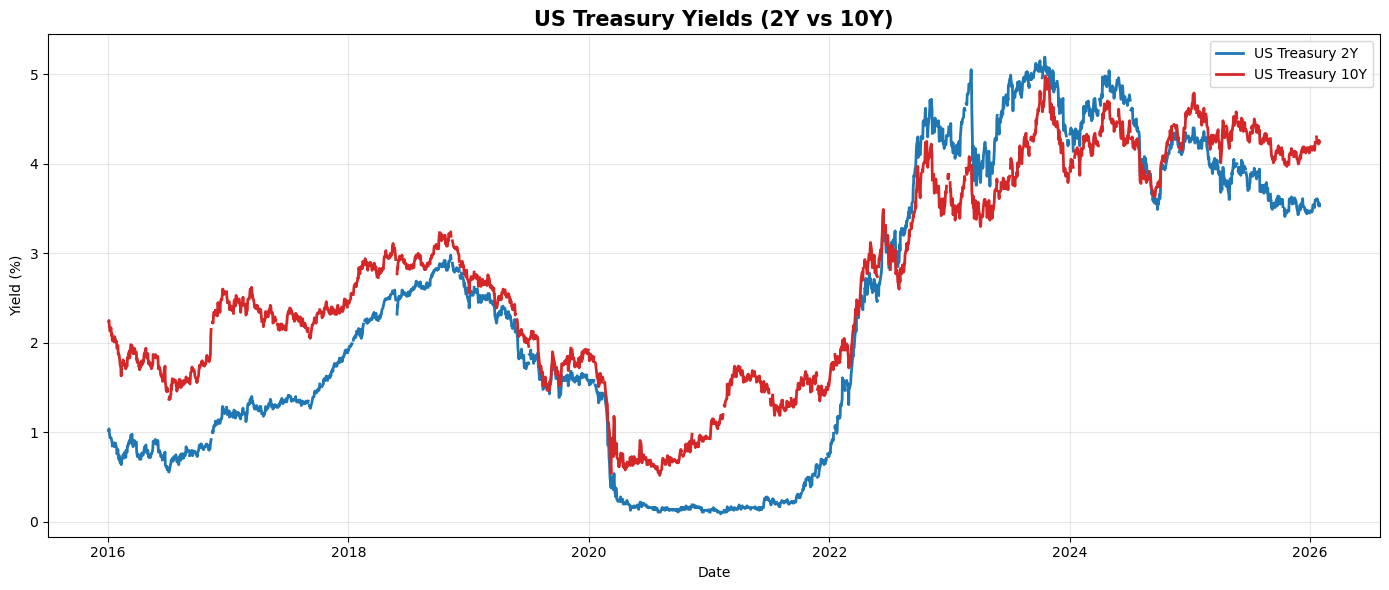

In [ ]:
import pandas_datareader.data as web

us_2y = web.DataReader("DGS2", "fred", start="2016-01-01")
us_10y = web.DataReader("DGS10", "fred", start="2016-01-01")

import matplotlib.pyplot as plt

# 결측치 제거 (FRED 데이터는 종종 NaN 있음)
df_rate = us_2y.join(us_10y, how="inner")
df_rate.columns = ["US_2Y", "US_10Y"]

# 그래프
plt.figure(figsize=(14, 6))

plt.plot(df_rate.index, df_rate["US_2Y"], label="US Treasury 2Y", color="tab:blue", linewidth=2)
plt.plot(df_rate.index, df_rate["US_10Y"], label="US Treasury 10Y", color="tab:red", linewidth=2)

plt.title("US Treasury Yields (2Y vs 10Y)", fontsize=15, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Yield (%)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


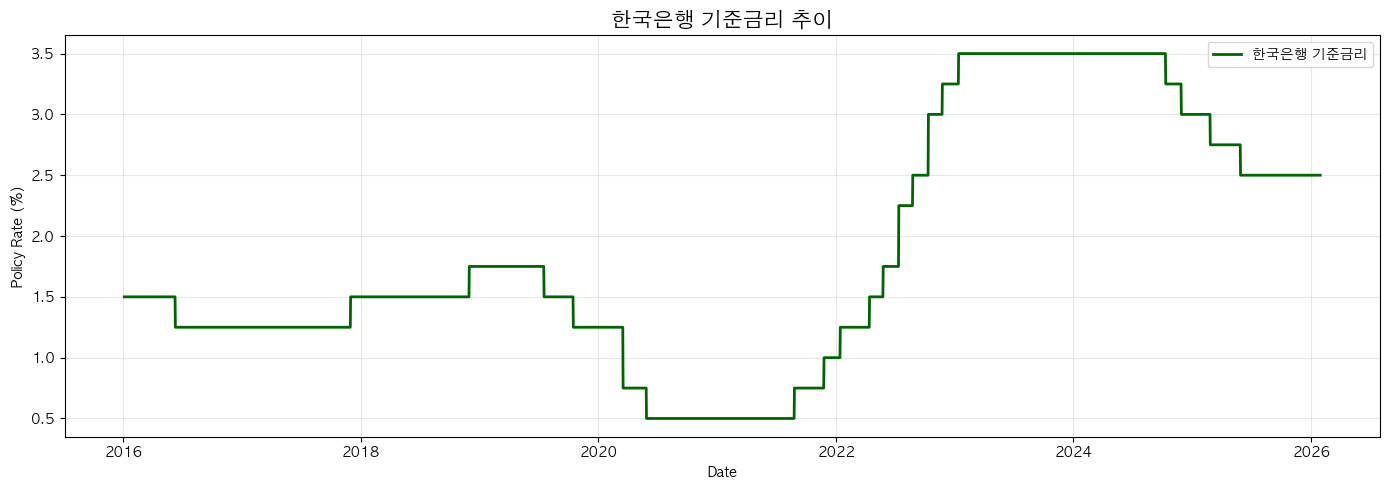

In [ ]:
# 한국은행 기준금리 CSV → 밑에서 그래프로 바로 보기
import pandas as pd
import matplotlib.pyplot as plt

# CSV 불러오기 (날짜가 컬럼명, 금리값은 첫 행)
df = pd.read_csv("../dataset/한국은행 기준금리 및 여수신금리_31185504.csv", encoding="utf-8")
date_cols = [c for c in df.columns if "/" in str(c) and len(str(c).split("/")) == 3]
row = df.iloc[0]
dates, values = [], []
for col in date_cols:
    val = row[col]
    if pd.notna(val) and str(val).strip():
        s = str(val).replace(",", "").strip()
        try:
            values.append(float(s))
            parts = str(col).split("/")
            if len(parts) == 3:
                dates.append(pd.to_datetime(f"{parts[0]}-{parts[1]}-{parts[2]}"))
        except ValueError:
            pass

kr_rate = pd.DataFrame({"date": dates, "policy_rate": values}).dropna()
kr_rate = kr_rate.sort_values("date").reset_index(drop=True)

plt.rcParams["font.family"] = ["AppleGothic", "Arial Unicode MS", "sans-serif"]
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize=(14, 5))
plt.plot(kr_rate["date"], kr_rate["policy_rate"], color="darkgreen", linewidth=2, label="한국은행 기준금리")
plt.title("한국은행 기준금리 추이", fontsize=15, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Policy Rate (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

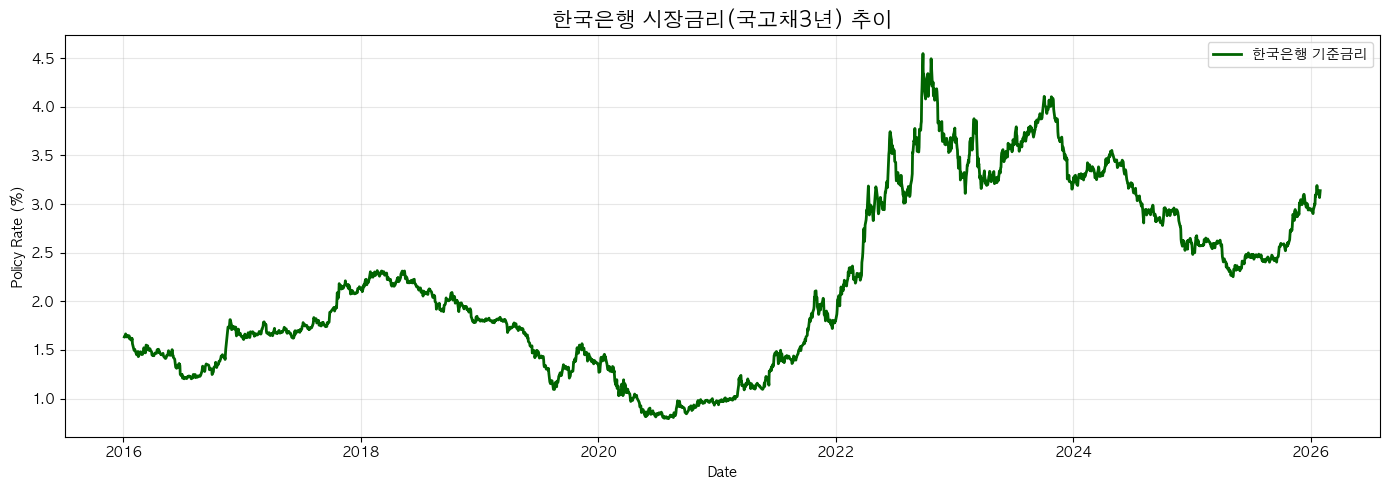

In [ ]:
# 한국은행 기준금리 CSV → 밑에서 그래프로 바로 보기
import pandas as pd
import matplotlib.pyplot as plt

# CSV 불러오기 (날짜가 컬럼명, 금리값은 첫 행)
df = pd.read_csv("../dataset/시장금리(일별)_31191727.csv", encoding="utf-8")
date_cols = [c for c in df.columns if "/" in str(c) and len(str(c).split("/")) == 3]
row = df.iloc[0]
dates, values = [], []
for col in date_cols:
    val = row[col]
    if pd.notna(val) and str(val).strip():
        s = str(val).replace(",", "").strip()
        try:
            values.append(float(s))
            parts = str(col).split("/")
            if len(parts) == 3:
                dates.append(pd.to_datetime(f"{parts[0]}-{parts[1]}-{parts[2]}"))
        except ValueError:
            pass

kr_rate = pd.DataFrame({"date": dates, "policy_rate": values}).dropna()
kr_rate = kr_rate.sort_values("date").reset_index(drop=True)

plt.rcParams["font.family"] = ["AppleGothic", "Arial Unicode MS", "sans-serif"]
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize=(14, 5))
plt.plot(kr_rate["date"], kr_rate["policy_rate"], color="darkgreen", linewidth=2, label="한국은행 기준금리")
plt.title("한국은행 시장금리(국고채3년) 추이", fontsize=15, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Policy Rate (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline")


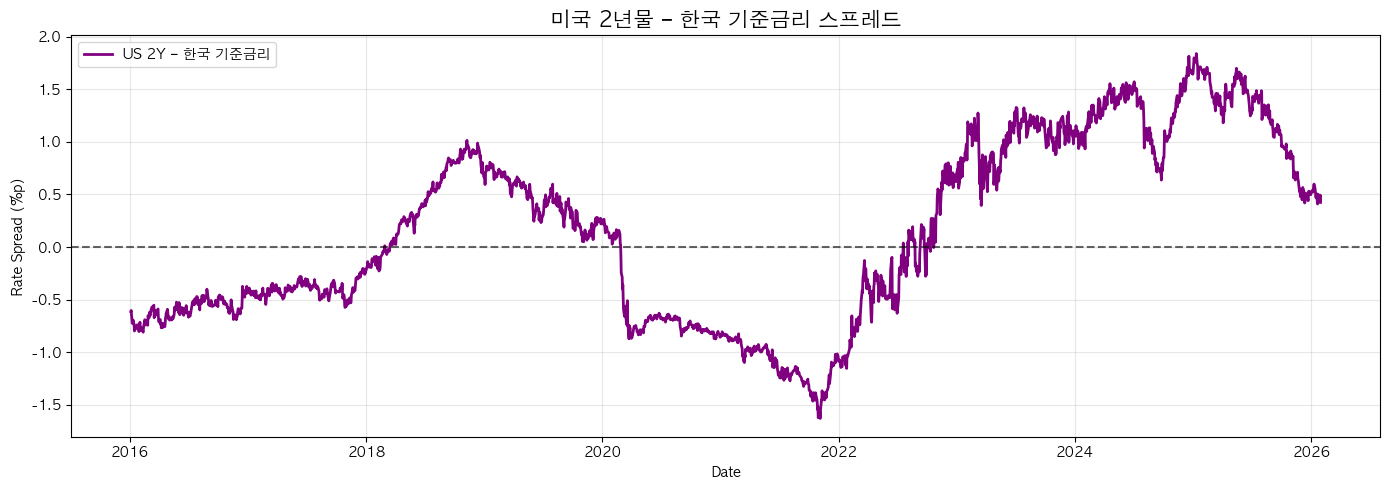

In [ ]:
# 날짜를 인덱스로 맞추기
us_2y_df = us_2y.copy()
us_2y_df = us_2y_df.rename(columns={"DGS2": "US_2Y"})
us_2y_df.index = pd.to_datetime(us_2y_df.index)

kr_rate_df = kr_rate.copy()
kr_rate_df["date"] = pd.to_datetime(kr_rate_df["date"])
kr_rate_df = kr_rate_df.set_index("date")

# 공통 날짜만 남김
rate_merge = us_2y_df.join(kr_rate_df, how="inner")
rate_merge = rate_merge.dropna()

rate_merge["rate_spread"] = rate_merge["US_2Y"] - rate_merge["policy_rate"]

plt.figure(figsize=(14, 5))

plt.plot(
    rate_merge.index,
    rate_merge["rate_spread"],
    color="purple",
    linewidth=2,
    label="US 2Y − 한국 기준금리"
)

plt.axhline(0, color="black", linestyle="--", alpha=0.6)

plt.title("미국 2년물 − 한국 기준금리 스프레드", fontsize=15, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Rate Spread (%p)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# 날짜를 인덱스로 맞추기
us_2y_df = us_2y.copy()
us_2y_df = us_2y_df.rename(columns={"DGS2": "US_2Y"})
us_2y_df.index = pd.to_datetime(us_2y_df.index)

kr_rate_df = kr_rate.copy()
kr_rate_df["date"] = pd.to_datetime(kr_rate_df["date"])
kr_rate_df = kr_rate_df.set_index("date")

# 공통 날짜만 남김
rate_merge = us_2y_df.join(kr_rate_df, how="inner")
rate_merge = rate_merge.dropna()

rate_merge["rate_spread"] = rate_merge["US_2Y"] - rate_merge["policy_rate"]

plt.figure(figsize=(14, 5))

plt.plot(
    rate_merge.index,
    rate_merge["rate_spread"],
    color="purple",
    linewidth=2,
    label="US 2Y − 한국 기준금리"
)

plt.axhline(0, color="black", linestyle="--", alpha=0.6)

plt.title("미국 2년물 − 한국 기준금리 스프레드", fontsize=15, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Rate Spread (%p)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

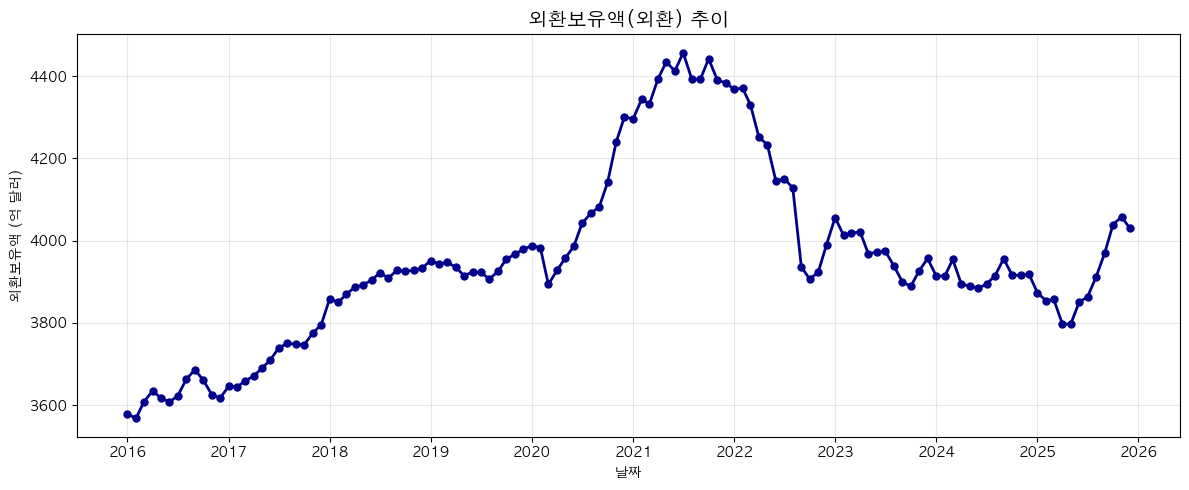

In [ ]:
# 외환보유액(외환) 시각화 — data/외환보유액_31193655.csv
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../dataset/외환보유액_31194018.csv", encoding="utf-8")
# 날짜 컬럼: 5번째 컬럼부터 (2024/12, 2025/01, ...)
date_cols = [c for c in df.columns[4:] if "/" in str(c)]
row = df.iloc[0]
dates, values = [], []
for col in date_cols:
    val = row[col]
    if pd.notna(val) and str(val).strip():
        s = str(val).replace(",", "").strip()
        try:
            v_천달러 = float(s)
            # 천달러 → 억 달러 (천달러 * 1000 / 1e8)
            values.append(v_천달러 / 100_000)
            parts = str(col).split("/")
            if len(parts) == 2:
                y, m = int(parts[0]), int(parts[1])
                dates.append(pd.Timestamp(year=y, month=m, day=1))
        except (ValueError, TypeError):
            pass

ts = pd.DataFrame({"date": dates, "외환보유액(억달러)": values})
ts = ts.sort_values("date").reset_index(drop=True)

plt.rcParams["font.family"] = ["AppleGothic", "Arial Unicode MS", "sans-serif"]
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize=(12, 5))
plt.plot(ts["date"], ts["외환보유액(억달러)"], color="darkblue", linewidth=2, marker="o", markersize=5)
plt.title("외환보유액(외환) 추이", fontsize=14, fontweight="bold")
plt.xlabel("날짜")
plt.ylabel("외환보유액 (억 달러)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

2017~2018 구간: 482일


,parspread,short,long,cds_gap,변동성,Gap_60,합,네이버검색량,RR,real_rate,60_gap_norm,gap_norm,trend_norm,navertrend_norm,cds_norm,RR_norm,fear_index,fx_z,fi_z
date,,,,,,,,,,,,,,,,,,,
2017-01-02,0.003903,0.003873,0.004709,-0.000837,4.2,45.468333,83,10.31702,0.200,1205.449951,0.714335,0.057732,0.654545,0.344955,0.207447,0.594955,1.801902,1.736422,0.701210
2017-01-03,0.003850,0.003870,0.004701,-0.000831,10.6,39.383333,88,10.87023,0.031,1202.930054,0.683642,0.189691,0.700000,0.409352,0.208649,0.456317,1.774317,1.589579,0.597816
2017-01-04,0.003839,0.003865,0.004691,-0.000827,4.2,40.850000,87,10.68497,0.131,1206.010010,0.691040,0.057732,0.690909,0.388433,0.209446,0.542658,1.831446,1.674622,0.746441
2017-01-05,0.003823,0.003863,0.004684,-0.000821,9.1,19.705000,95,12.99838,-0.175,1194.479980,0.584386,0.158763,0.763636,0.616079,0.210527,0.296555,1.886797,1.181264,0.886752
2017-01-06,0.003906,0.003864,0.004675,-0.000811,10.2,25.453333,87,12.06904,0.075,1180.630005,0.613380,0.181443,0.690909,0.534044,0.212605,0.489336,1.926894,0.599086,0.979106


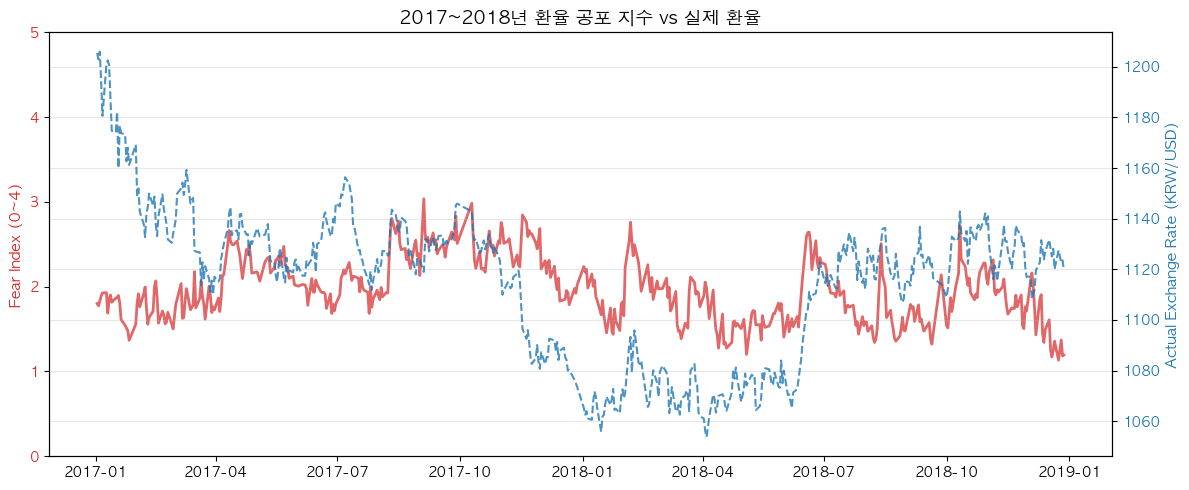

In [ ]:
# 2017년 ~ 2018년 구간만 크롭
merged_df_2017_2018 = merged_df.loc['2017-01-01':'2018-12-31']

# 확인
print(f"2017~2018 구간: {len(merged_df_2017_2018)}일")
display(merged_df_2017_2018.head())

# 2017~2018 구간 시각화 (이중 축)
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.set_ylabel('Fear Index (0~4)', color='tab:red', fontsize=11)
ax1.plot(merged_df_2017_2018.index, merged_df_2017_2018['fear_index'], color='tab:red', linewidth=2, alpha=0.7)
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_ylim(0.0, 5.0)
ax2 = ax1.twinx()
ax2.set_ylabel('Actual Exchange Rate (KRW/USD)', color='tab:blue', fontsize=11)
ax2.plot(merged_df_2017_2018.index, merged_df_2017_2018['real_rate'], color='tab:blue', linestyle='--', alpha=0.8)
ax2.tick_params(axis='y', labelcolor='tab:blue')
plt.title('2017~2018년 환율 공포 지수 vs 실제 환율', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

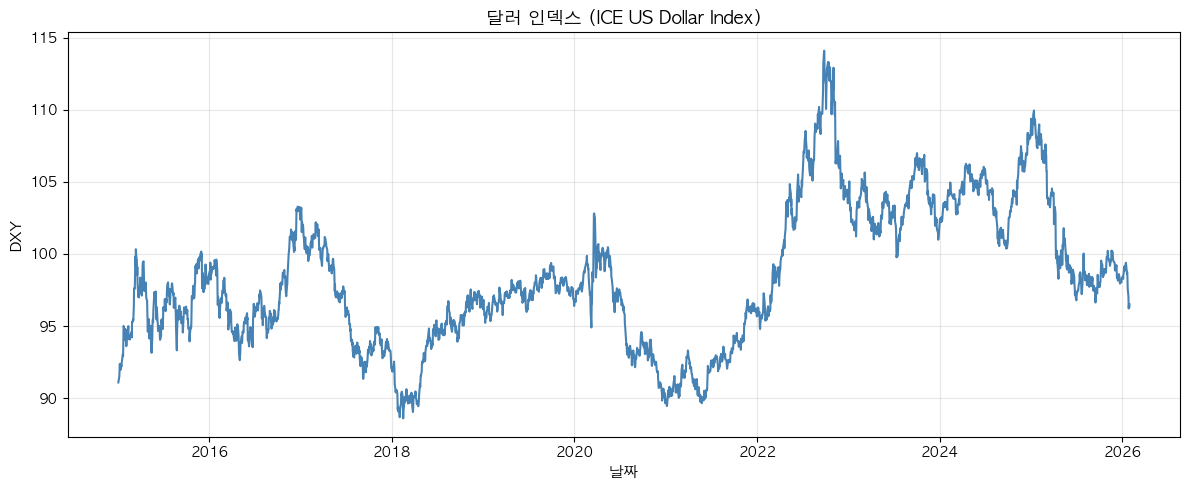

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ICE US Dollar Index (Yahoo: DX-Y.NYB)
dxy_raw = yf.download("DX-Y.NYB", start="2015-01-01", progress=False, auto_adjust=True)
close = dxy_raw["Close"].squeeze()
dxy = pd.DataFrame({"DXY": close}, index=close.index).dropna()

# DXY 시계열 플롯
plt.rcParams['font.family'] = ['AppleGothic', 'Arial Unicode MS', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(dxy.index, dxy["DXY"], color="steelblue", linewidth=1.5)
ax.set_xlabel("날짜", fontsize=11)
ax.set_ylabel("DXY", fontsize=11)
ax.set_title("달러 인덱스 (ICE US Dollar Index)", fontsize=13, fontweight="bold")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

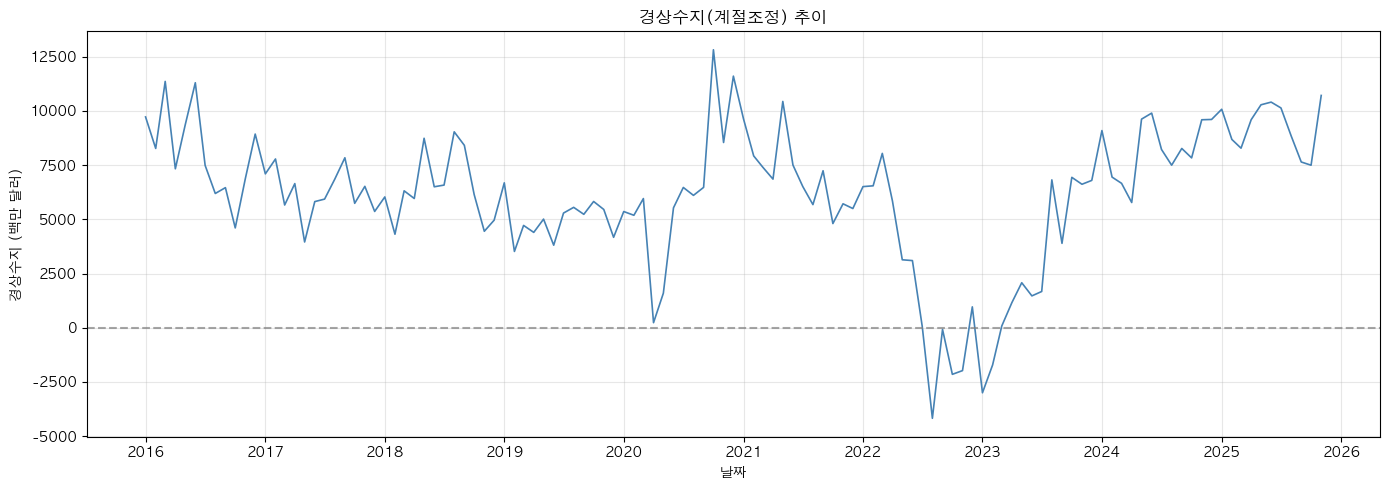

In [ ]:
# 경상수지(계절조정) 시각화 - data/경상수지(계절조정)_31201823.csv
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../dataset/경상수지(계절조정)_31201823.csv", encoding="utf-8")
# 첫 행: 헤더, 둘째 행: 데이터. 날짜 컬럼은 5번째(인덱스 4)부터
headers = df.columns.tolist()
date_cols = [c for c in headers[4:] if "/" in str(c)]  # 2016/01 형태
row = df.iloc[0]
values = [float(str(row[c]).replace(",", "")) for c in date_cols]
dates = pd.to_datetime(date_cols, format="%Y/%m")
plot_df = pd.DataFrame({"date": dates, "경상수지": values})

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(plot_df["date"], plot_df["경상수지"], color="steelblue", linewidth=1.2)
ax.axhline(0, color="gray", linestyle="--", alpha=0.7)
ax.set_xlabel("날짜")
ax.set_ylabel("경상수지 (백만 달러)")
ax.set_title("경상수지(계절조정) 추이")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

df = merged_df.copy()

# 1단계: 변화량 계산
df['fear_diff'] = df['fear_index'].diff()
df['ex_diff']   = df['real_rate'].diff()

# 2단계: 변화 방향(+1, 0, -1)
df['fear_sign'] = np.sign(df['fear_diff'])
df['ex_sign']   = np.sign(df['ex_diff'])

# 3단계: 변화 크기(절댓값)
df['fear_abs'] = df['fear_diff'].abs()
df['ex_abs']   = df['ex_diff'].abs()

# 4단계: "크게 움직인 날" 기준 만들기 (예: 상위 10% 이상만)
fear_thr = df['fear_abs'].quantile(0.90)
ex_thr   = df['ex_abs'].quantile(0.90)

big_move = (df['fear_abs'] >= fear_thr) & (df['ex_abs'] >= ex_thr)

# 5단계: 큰 움직임 + 방향 반대인 날만 선택
cond_opposite = (df['fear_sign'] * df['ex_sign']) == -1
salient_points = df[big_move & cond_opposite]

salient_points.head(), len(salient_points)

(            parspread     short      long   cds_gap   변동성     Gap_60    합  \
 date                                                                        
 2016-06-07   0.004972  0.005104  0.005393 -0.000288   4.7  -2.120000   41   
 2016-08-01   0.004248  0.004321  0.005411 -0.001090   7.0 -53.305000   38   
 2016-11-09   0.004020  0.003897  0.004841 -0.000944  28.6  30.110000   67   
 2017-03-16   0.003768  0.003981  0.004347 -0.000366   4.6 -33.781667  100   
 2017-09-05   0.005943  0.005546  0.004446  0.001100   4.5  -1.881667   75   
 
               네이버검색량     RR    real_rate  ...  navertrend_norm  cds_norm  \
 date                                      ...                              
 2016-06-07  18.11655 -0.013  1157.900024  ...         0.855209  0.316839   
 2016-08-01  12.64406  0.275  1109.949951  ...         0.589828  0.156893   
 2016-11-09  31.63469  0.438  1127.859985  ...         0.986874  0.185983   
 2017-03-16  16.14090 -0.200  1127.400024  ...         0.785070  0.

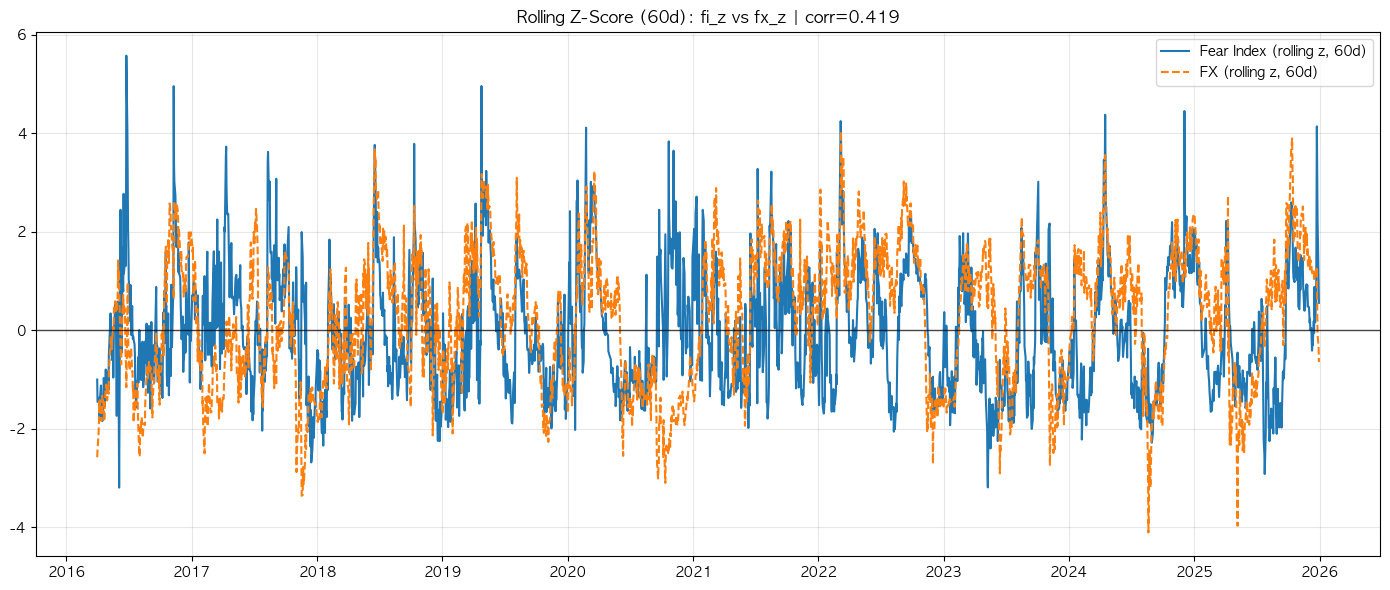

,fi_z,fx_z
fi_z,1.000000,0.418523
fx_z,0.418523,1.000000


In [ ]:
fx = merged_df['real_rate']

merged_df['fx_z'] = (
    fx - fx.rolling(60).mean()
) / fx.rolling(60).std()

merged_df['fi_z'] = (
    merged_df['fear_index'] - merged_df['fear_index'].rolling(60).mean()
) / merged_df['fear_index'].rolling(60).std()

corr = merged_df[['fi_z','fx_z']].corr().iloc[0, 1]

# --- 그래프 ---
plt.figure(figsize=(14, 6))
plt.plot(merged_df.index, merged_df['fi_z'], label='Fear Index (rolling z, 60d)')
plt.plot(merged_df.index, merged_df['fx_z'], label='FX (rolling z, 60d)', linestyle='--')
plt.axhline(0, color='black', linewidth=1, alpha=0.7)
plt.title(f'Rolling Z-Score (60d): fi_z vs fx_z | corr={corr:.3f}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

merged_df[['fi_z','fx_z']].corr()

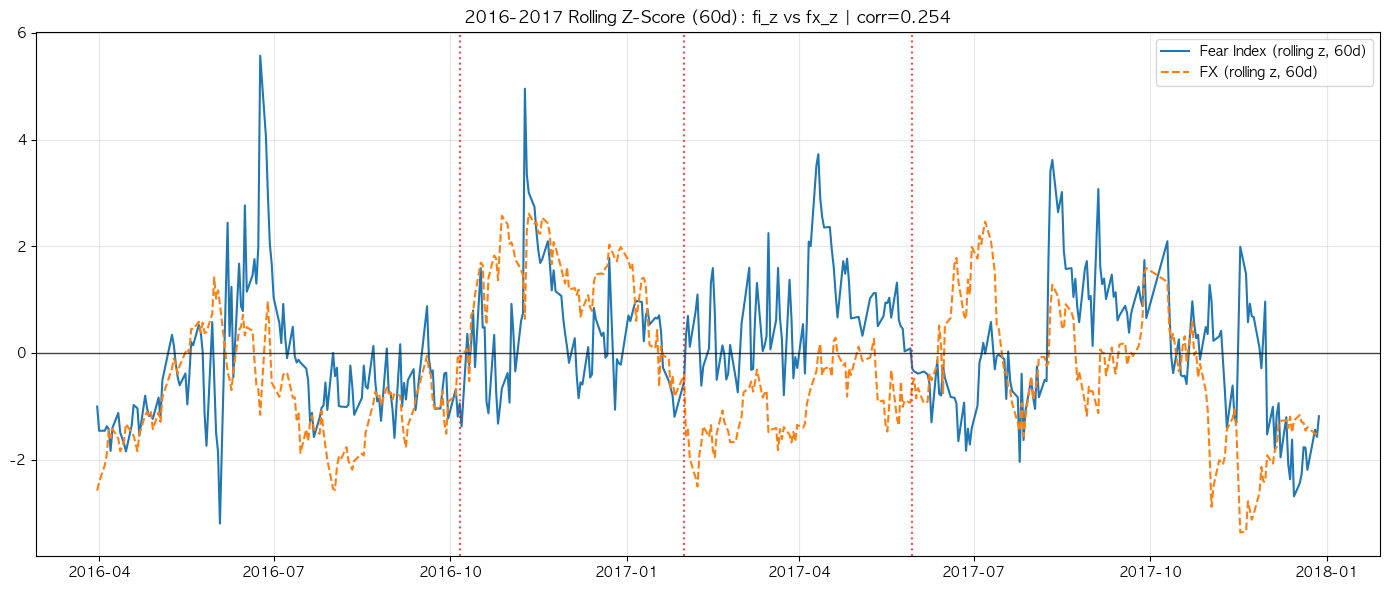

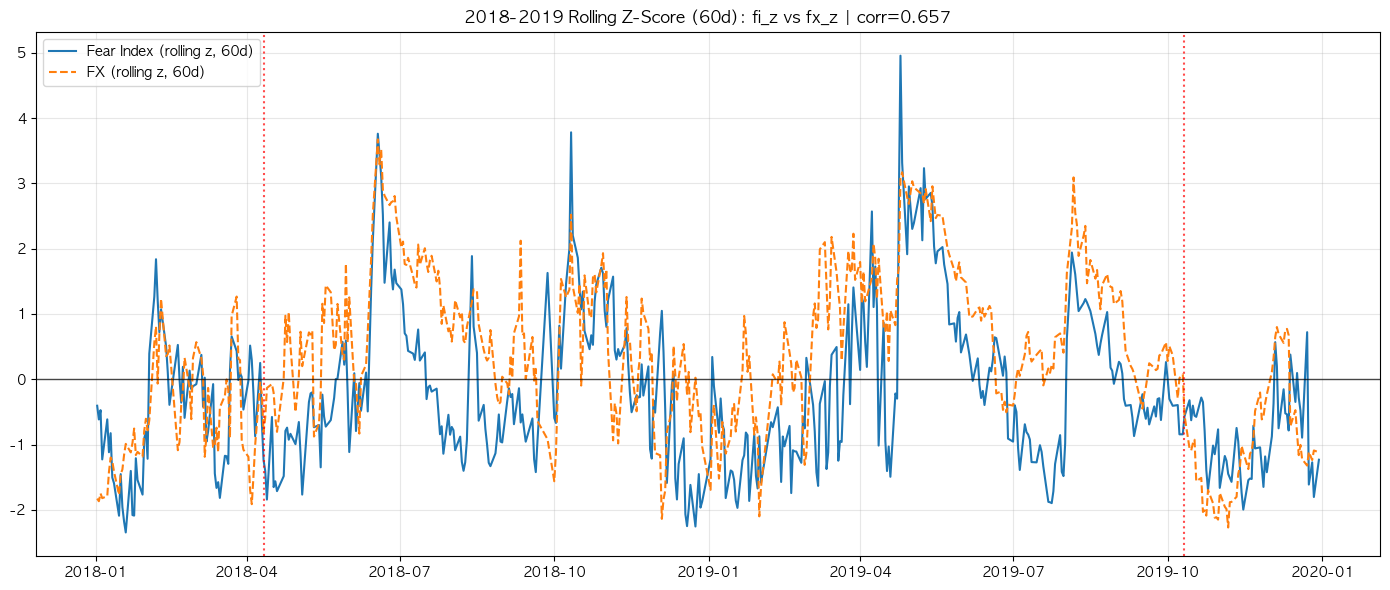

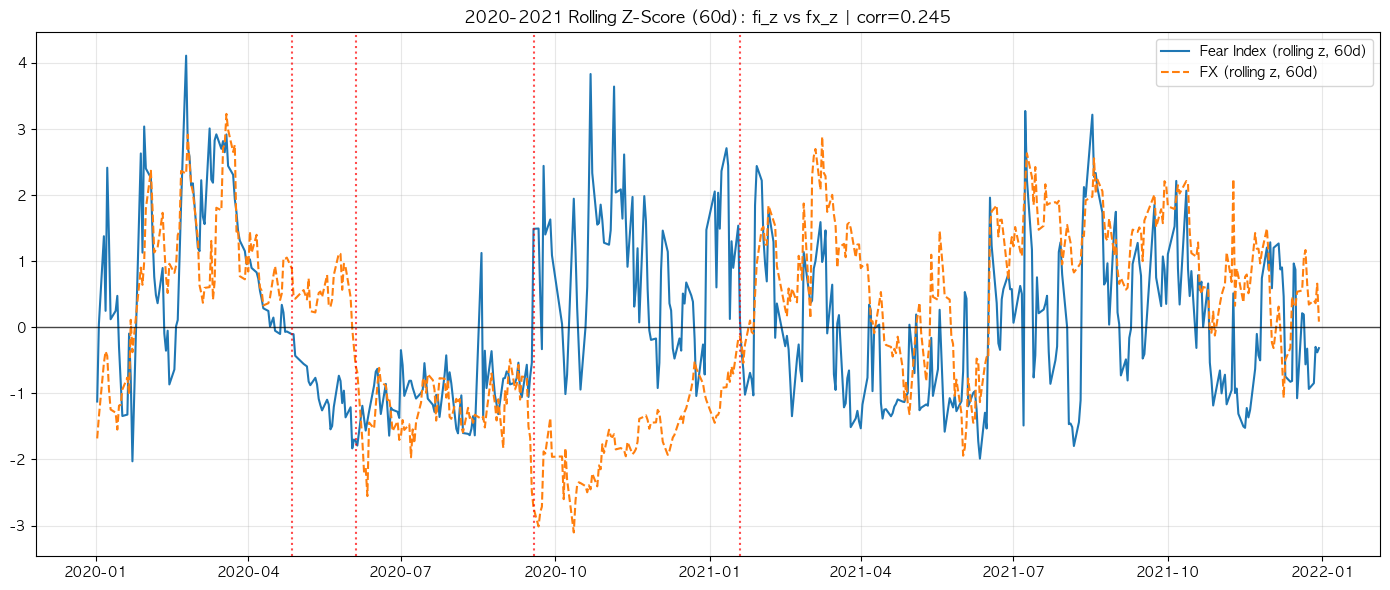

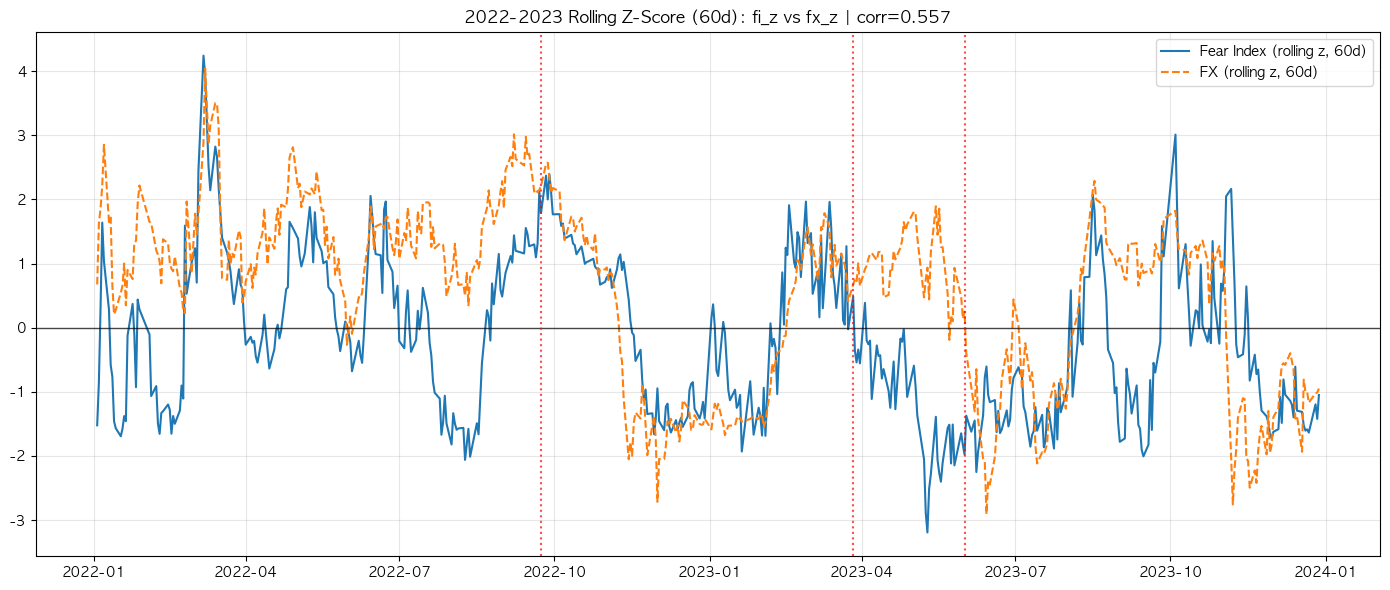

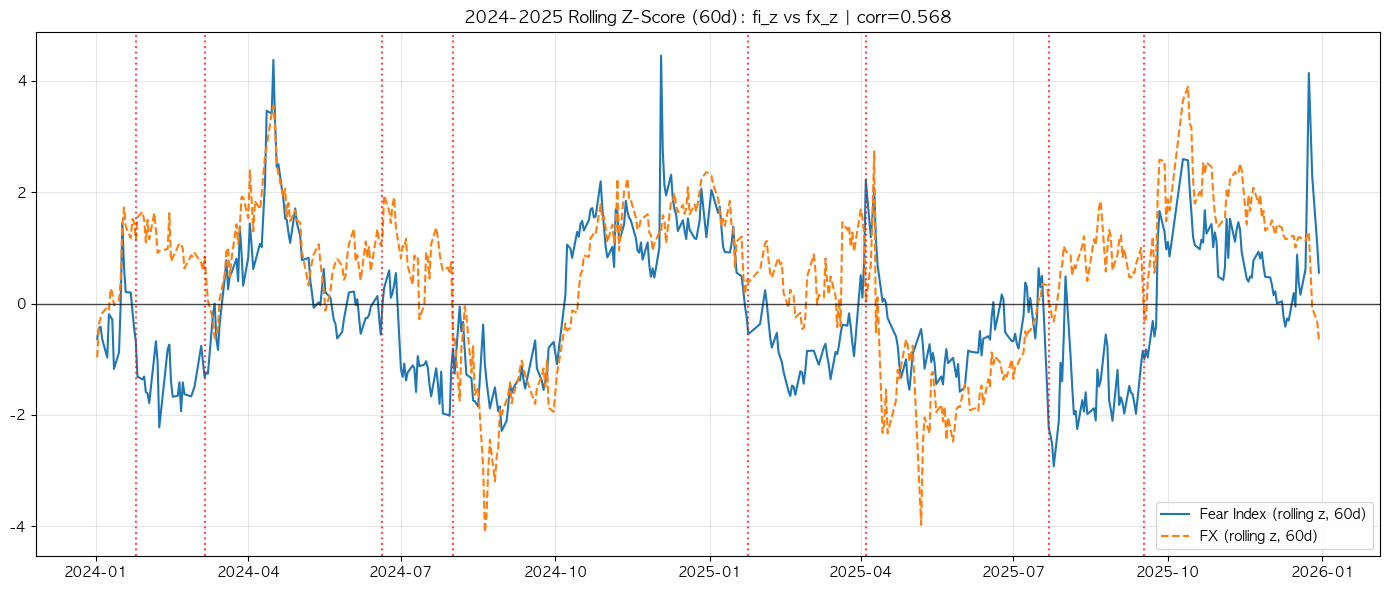

In [ ]:
import pandas as pd

# 이벤트 날짜들
event_dates = pd.to_datetime([
    '2016-10-06', '2017-01-31', '2017-05-30', '2018-04-11',
    '2019-10-11', '2020-04-27', '2020-06-04', '2020-09-18',
    '2021-01-19', '2022-09-23', '2023-03-27', '2023-06-01',
    '2024-01-25', '2024-03-06', '2024-06-20', '2024-08-01',
    '2025-01-24', '2025-04-04', '2025-07-22', '2025-09-17'
])

# 2년 단위로 크롭해서 플롯
start_year = merged_df.index.year.min()
end_year   = merged_df.index.year.max()

for y in range(start_year, end_year + 1, 2):
    start_date = f'{y}-01-01'
    end_date   = f'{y+1}-12-31'  # y, y+1년까지 포함

    df_win = merged_df.loc[start_date:end_date].copy()
    if df_win.empty:
        continue

    corr_win = df_win[['fi_z', 'fx_z']].corr().iloc[0, 1]

    plt.figure(figsize=(14, 6))
    plt.plot(df_win.index, df_win['fi_z'], label='Fear Index (rolling z, 60d)')
    plt.plot(df_win.index, df_win['fx_z'], label='FX (rolling z, 60d)', linestyle='--')
    plt.axhline(0, color='black', linewidth=1, alpha=0.7)

    # 이 윈도우 안에 포함되는 이벤트 날짜들에 대해 수직선
    for d in event_dates:
        if df_win.index[0] <= d <= df_win.index[-1]:
            plt.axvline(d, color='red', linestyle=':', alpha=0.7)

    plt.title(f'{y}-{y+1} Rolling Z-Score (60d): fi_z vs fx_z | corr={corr_win:.3f}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

In [ ]:
import ruptures as rpt
import statsmodels.api as sm
import pandas as pd

# 1) 분석용 데이터프레임 준비 (결측 제거)
df = merged_df.copy()
df_z = df[['fi_z', 'fx_z']].dropna().copy()
df_z['z_gap'] = df_z['fi_z'] - df_z['fx_z']

# 2) 체인지포인트 탐지 (ruptures)
signal = df_z['z_gap'].values

algo = rpt.Pelt(model="rbf").fit(signal)
breaks = algo.predict(pen=10)  # 예: [idx1, idx2, ..., len(signal)]

# 마지막 값(len(signal))은 전체 길이를 의미하므로, 구간 경계로 쓸 때는 제외해두고,
# 날짜만 볼 땐 필요에 따라 포함/제외 선택
break_indices = breaks[:-1]  # 마지막은 전체 길이이므로 제외
break_dates = df_z.index[break_indices]
display(break_dates)

# 3) 각 구간별로 수준(level)·추세(trend) 추정 (OLS)
results = []

segments = [0] + breaks  # [0, idx1, idx2, ..., len(signal)]
for i in range(len(segments) - 1):
    start_i = segments[i]
    end_i = segments[i + 1]

    seg = df_z.iloc[start_i:end_i].copy()
    seg = seg.dropna(subset=['z_gap'])

    if len(seg) < 2:
        # 점 하나/비어있는 구간은 회귀 불가능하므로 스킵
        continue

    X = sm.add_constant(range(len(seg)))
    y = seg['z_gap'].values
    model = sm.OLS(y, X).fit()

    results.append({
        'segment': i,
        'start': seg.index[0],   # 인덱스가 날짜
        'end': seg.index[-1],
        'level': model.params[0],
        'trend': model.params[1],
    })

results_df = pd.DataFrame(results)
display(results_df)

DatetimeIndex(['2016-10-06', '2017-01-31', '2017-05-30', '2018-04-11',
               '2019-10-11', '2020-04-27', '2020-06-04', '2020-09-18',
               '2021-01-19', '2022-09-23', '2023-03-27', '2023-06-01',
               '2024-01-25', '2024-03-06', '2024-06-20', '2024-08-01',
               '2025-01-24', '2025-04-04', '2025-07-22', '2025-09-17'],
              dtype='datetime64[ns]', name='date', freq=None)

,segment,start,end,level,trend
0,0,2016-03-31,2016-10-05,0.254949,0.004425
1,1,2016-10-06,2017-01-26,-1.213152,0.009142
2,2,2017-01-31,2017-05-29,1.816234,-0.001908
3,3,2017-05-30,2018-04-10,0.002803,0.002840
4,4,2018-04-11,2019-10-10,-0.828510,0.000162
5,5,2019-10-11,2020-04-24,0.395346,-0.003922
6,6,2020-04-27,2020-06-03,-0.990865,-0.044783
7,7,2020-06-04,2020-09-17,0.126682,0.002652
8,8,2020-09-18,2021-01-18,3.643584,-0.026078
9,9,2021-01-19,2022-09-22,-0.768953,-0.001391


In [ ]:
import numpy as np

df = merged_df.copy()

# 기준값
FI_EVENT_THR = 1.5
FX_QUIET_THR = 0.5

# 조건
cond_fi_event = df['fi_z'].abs() >= FI_EVENT_THR
cond_fx_quiet = df['fx_z'].abs() < FX_QUIET_THR

# fi_z만 큰데 fx_z는 조용한 날
fi_only_events = df[cond_fi_event & cond_fx_quiet].copy()

fi_only_events[['fi_z', 'fx_z']].head(), len(fi_only_events)


(                fi_z      fx_z
 date                          
 2016-05-27 -1.740315  0.391504
 2016-06-07  2.441679 -0.350563
 2016-06-13  1.672871  0.431294
 2016-06-16  2.767227  0.326627
 2016-06-21  1.758929 -0.138102,
 74)

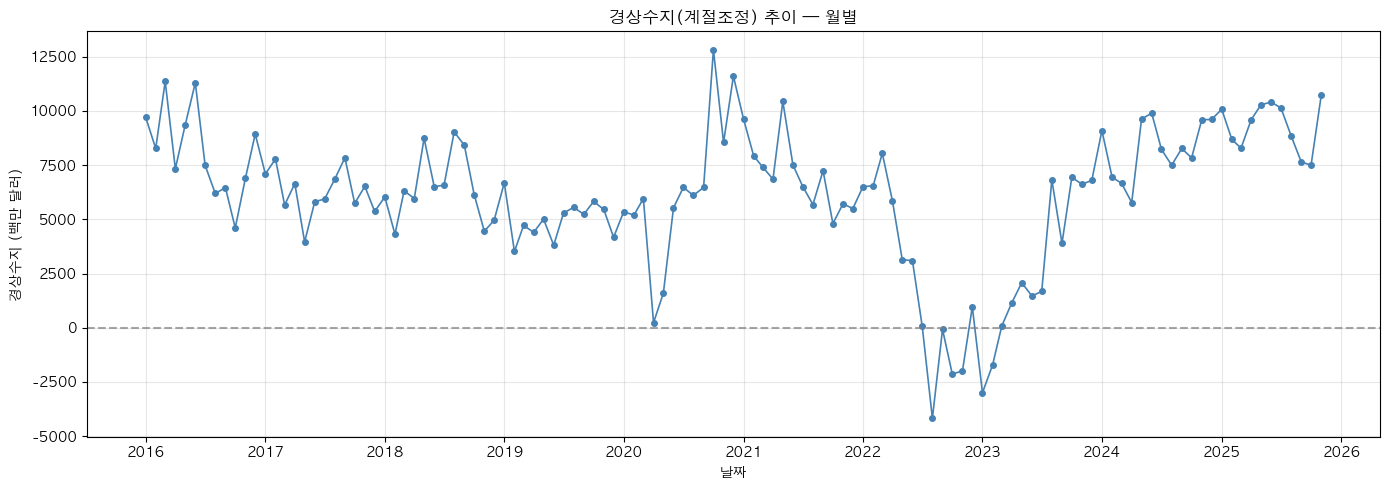

In [ ]:
# 경상수지(계절조정) 시각화 - 원본 월별
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../dataset/경상수지(계절조정)_31201823.csv", encoding="utf-8")
headers = df.columns.tolist()
date_cols = [c for c in headers[4:] if "/" in str(c)]
row = df.iloc[0]
values = [float(str(row[c]).replace(",", "")) for c in date_cols]
dates = pd.to_datetime(date_cols, format="%Y/%m")
monthly_df = pd.DataFrame({"date": dates, "경상수지": values}).set_index("date")

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(monthly_df.index, monthly_df["경상수지"], color="steelblue", linewidth=1.2, marker="o", markersize=4)
ax.axhline(0, color="gray", linestyle="--", alpha=0.7)
ax.set_xlabel("날짜")
ax.set_ylabel("경상수지 (백만 달러)")
ax.set_title("경상수지(계절조정) 추이 — 월별")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/0g/k3k9nnvj169310c16f709ggh0000gp/T/ipykernel_80871/2701298116.py:14: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_df = monthly_df.resample("Q").sum().reset_index()


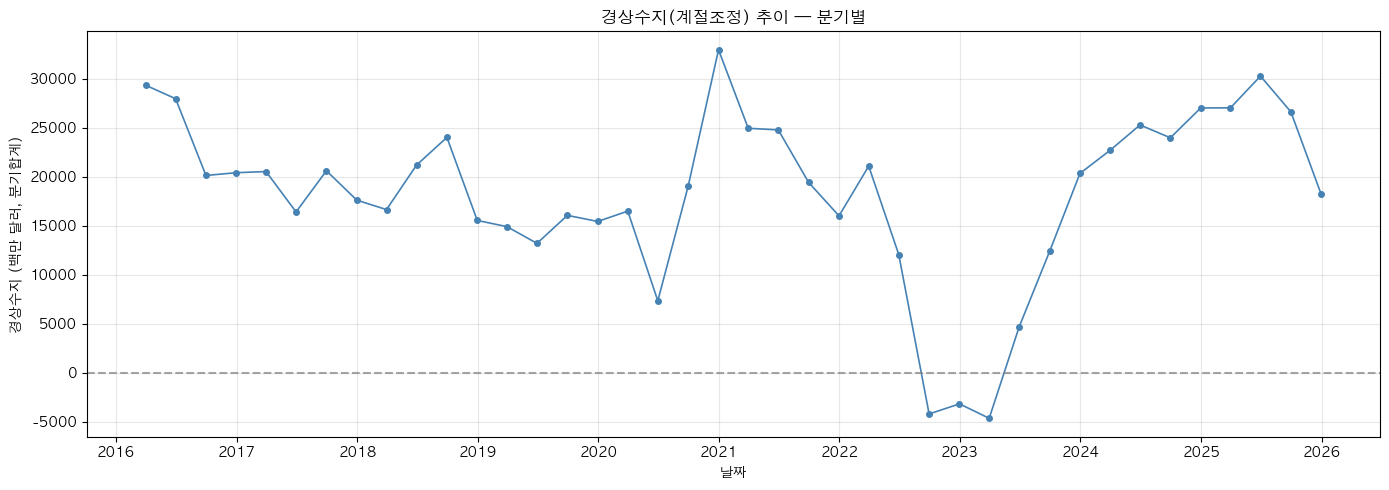

In [ ]:
# 경상수지(계절조정) 시각화 - 원본 월별
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../dataset/경상수지(계절조정)_31201823.csv", encoding="utf-8")
headers = df.columns.tolist()
date_cols = [c for c in headers[4:] if "/" in str(c)]
row = df.iloc[0]
values = [float(str(row[c]).replace(",", "")) for c in date_cols]
dates = pd.to_datetime(date_cols, format="%Y/%m")
monthly_df = pd.DataFrame({"date": dates, "경상수지": values}).set_index("date")

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(monthly_df.index, monthly_df["경상수지"], color="steelblue", linewidth=1.2, marker="o", markersize=4)
ax.axhline(0, color="gray", linestyle="--", alpha=0.7)
ax.set_xlabel("날짜")
ax.set_ylabel("경상수지 (백만 달러)")
ax.set_title("경상수지(계절조정) 추이 — 월별")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

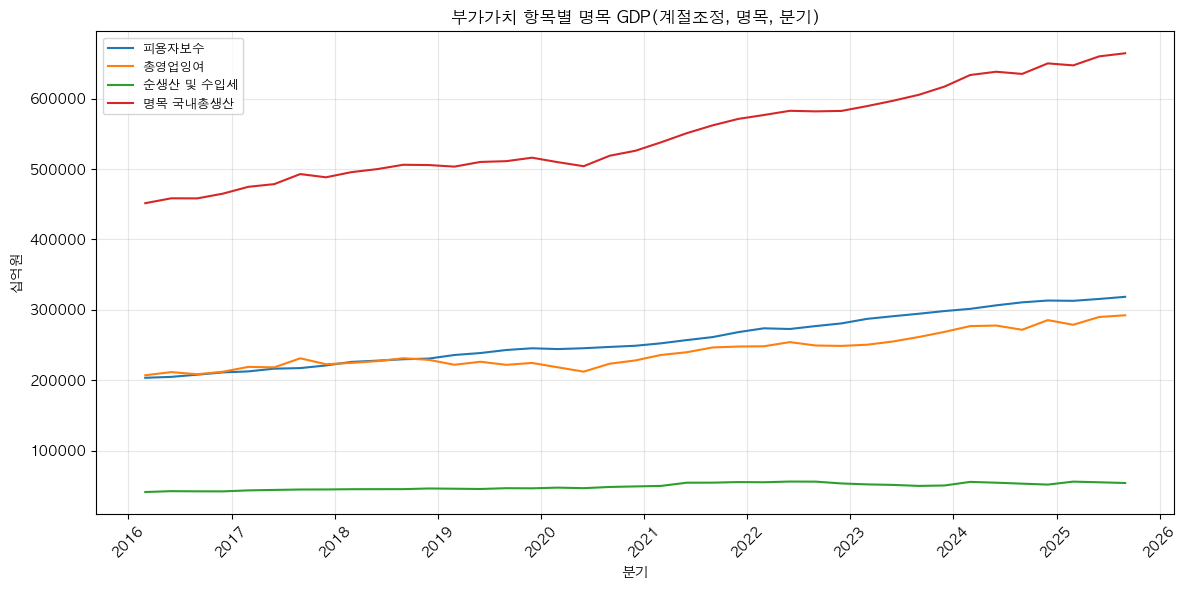

In [ ]:
# 부가가치 항목별 명목 GDP(계절조정, 명목, 분기) 시각화
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = ["AppleGothic", "Arial Unicode MS", "sans-serif"]
plt.rcParams["axes.unicode_minus"] = False

csv_path = "../dataset/부가가치 항목별 명목 GDP(계절조정, 명목, 분기)_31203312.csv"
df = pd.read_csv(csv_path, encoding="utf-8")

# 날짜 컬럼: 5번째 컬럼부터 (2016/Q1 형식)
date_cols = [c for c in df.columns[4:] if isinstance(c, str) and "Q" in c and "/" in c]
def qstr_to_date(s):
    s = str(s).strip()
    if not s or s == "nan":
        return None
    parts = s.split("/")
    if len(parts) != 2:
        return None
    y, q = parts[0].strip(), parts[1].strip()
    try:
        qnum = int(q.replace("Q", ""))
        month = qnum * 3
        return pd.Timestamp(year=int(y), month=month, day=1)
    except ValueError:
        return None

dates = [qstr_to_date(c) for c in date_cols]
dates = [d for d in dates if d is not None]

fig, ax = plt.subplots(figsize=(12, 6))
for i, row in df.iterrows():
    name = row["계정항목"]
    vals = []
    for col in date_cols:
        v = row[col]
        if pd.isna(v) or str(v).strip() == "":
            break
        try:
            vals.append(float(str(v).replace(",", "")))
        except ValueError:
            vals.append(np.nan)
    n = min(len(dates), len(vals))
    if n == 0:
        continue
    ax.plot(dates[:n], vals[:n], label=name, linewidth=1.5)

ax.set_xlabel("분기")
ax.set_ylabel("십억원")
ax.set_title("부가가치 항목별 명목 GDP(계절조정, 명목, 분기)")
ax.legend(loc="best", fontsize=9)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 변동성 레짐별 회귀 (fx_return 추가 후 실행)
import numpy as np
import statsmodels.api as sm

# fx_return: real_rate의 로그 수익률 (없으면 에러 나므로 먼저 생성)
merged_df["fx_return"] = np.log(merged_df["real_rate"] / merged_df["real_rate"].shift(1))

merged_df["fx_vol"] = merged_df["변동성"]
merged_df["fx_vol_abnormal"] = (
    merged_df["fx_vol"] - merged_df["fx_vol"].rolling(252).mean()
)

q75 = merged_df["fx_vol_abnormal"].quantile(0.75)
q25 = merged_df["fx_vol_abnormal"].quantile(0.25)

merged_df["vol_regime"] = "mid"
merged_df.loc[merged_df["fx_vol_abnormal"] >= q75, "vol_regime"] = "high"
merged_df.loc[merged_df["fx_vol_abnormal"] <= q25, "vol_regime"] = "low"

merged_df["fx_vol_change"] = merged_df["fx_vol"].diff()


def run_regime_regression(df, regime):
    sub = df[df["vol_regime"] == regime].dropna(
        subset=["fx_return", "fear_index"]
    )
    X = sm.add_constant(sub["fear_index"])
    y = sub["fx_return"]
    return sm.OLS(y, X).fit()


res_low = run_regime_regression(merged_df, "low")
res_high = run_regime_regression(merged_df, "high")

print("LOW volatility regime")
print(res_low.summary())

print("\nHIGH volatility regime")
print(res_high.summary())

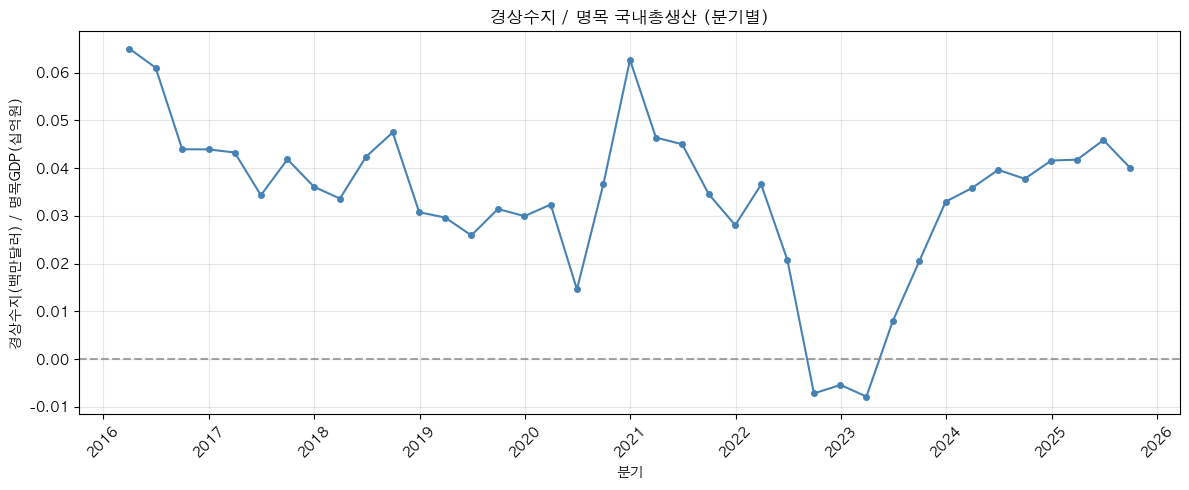

In [ ]:
# 경상수지 / 명목 국내총생산 한 지표 시각화 (분기별)
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = ["AppleGothic", "Arial Unicode MS", "sans-serif"]
plt.rcParams["axes.unicode_minus"] = False

# 1) 경상수지: 월별 → 분기 합계 (백만 달러)
df_ca = pd.read_csv("../dataset/경상수지(계절조정)_31201823.csv", encoding="utf-8")
date_cols_ca = [c for c in df_ca.columns[4:] if "/" in str(c)]
row_ca = df_ca.iloc[0]
values_ca = [float(str(row_ca[c]).replace(",", "")) for c in date_cols_ca]
dates_ca = pd.to_datetime(date_cols_ca, format="%Y/%m")
monthly_ca = pd.DataFrame({"date": dates_ca, "경상수지": values_ca}).set_index("date")
quarterly_ca = monthly_ca.resample("QE").sum().reset_index()
quarterly_ca["quarter"] = quarterly_ca["date"]

# 2) 명목 국내총생산: 분기 데이터 (십억원)
df_gdp = pd.read_csv("../dataset/부가가치 항목별 명목 GDP(계절조정, 명목, 분기)_31203312.csv", encoding="utf-8")
gdp_row = df_gdp[df_gdp["계정항목"] == "명목 국내총생산"].iloc[0]
date_cols_gdp = [c for c in df_gdp.columns[4:] if isinstance(c, str) and "Q" in c and "/" in c]
def qstr_to_date(s):
    s = str(s).strip()
    if not s or s == "nan": return None
    parts = s.split("/")
    if len(parts) != 2: return None
    y, q = parts[0].strip(), parts[1].strip().replace("Q", "")
    try:
        m = int(q) * 3
        return pd.Timestamp(year=int(y), month=m, day=1)
    except ValueError: return None
dates_gdp = [qstr_to_date(c) for c in date_cols_gdp]
dates_gdp = [d for d in dates_gdp if d is not None]
vals_gdp = []
for c in date_cols_gdp:
    v = gdp_row[c]
    if pd.isna(v) or str(v).strip() == "": break
    try: vals_gdp.append(float(str(v).replace(",", "")))
    except ValueError: vals_gdp.append(float("nan"))
n_gdp = min(len(dates_gdp), len(vals_gdp))
quarterly_gdp = pd.DataFrame({"quarter": dates_gdp[:n_gdp], "명목국내총생산": vals_gdp[:n_gdp]})

# 3) 분기 말일로 맞춰 merge (경상수지: QE, GDP: Q→월 말)
quarterly_gdp["quarter"] = pd.to_datetime(quarterly_gdp["quarter"]) + pd.offsets.QuarterEnd(0)
merged = pd.merge(quarterly_ca, quarterly_gdp, on="quarter", how="inner")

# 4) 지표: 경상수지(백만달러) / 명목국내총생산(십억원) → 비율 (단위 맞춘 비율)
#    또는 상대지표: (경상수지/명목GDP) * 100 → 경상수지가 GDP 대비 몇 % 수준인지 (단, 환율 적용 시 %)
#    여기서는 동일 기간 비율만 계산 (십억원 단위로 GDP, 백만달러로 CA이므로 0.001*CA/GDP = CA(억달러)/GDP(조원) 근사)
merged["비율"] = merged["경상수지"] / merged["명목국내총생산"]

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(merged["quarter"], merged["비율"], color="steelblue", linewidth=1.5, marker="o", markersize=4)
ax.axhline(0, color="gray", linestyle="--", alpha=0.7)
ax.set_xlabel("분기")
ax.set_ylabel("경상수지(백만달러) / 명목GDP(십억원)")
ax.set_title("경상수지 / 명목 국내총생산 (분기별)")
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()